In [1]:
import pandas as pd
df=pd.read_csv("BankChurners.csv",sep=",")
df

,client_no,attrition_flag,customer_age,gender,education_level,marital_status,income_category,card_category,months_on_book,months_inactive_12_mon,credit_limit,total_revolving_bal,total_trans_amt,avg_utilization_ratio
0,768805383,Existing Customer,45,M,High School,Married,$60K - $80K,Blue,39,1,12691.0,777,1144,0.061
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,Blue,44,1,8256.0,864,1291,0.105
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,Blue,36,1,3418.0,0,1887,0.000
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,Blue,34,4,3313.0,2517,1171,0.760
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,Blue,21,1,4716.0,0,816,0.000
5,713061558,Existing Customer,44,M,Graduate,Married,$40K - $60K,Blue,36,1,4010.0,1247,1088,0.311
6,810347208,Existing Customer,51,M,Unknown,Married,$120K +,Gold,46,1,34516.0,2264,1330,0.066
7,818906208,Existing Customer,32,M,High School,Unknown,$60K - $80K,Silver,27,2,29081.0,1396,1538,0.048
8,710930508,Existing Customer,37,M,Uneducated,Single,$60K - $80K,Blue,36,2,22352.0,2517,1350,0.113
9,719661558,Existing Customer,48,M,Graduate,Single,$80K - $120K,Blue,36,3,11656.0,1677,1441,0.144


In [2]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
#retrieving number of rows and columns
df.shape

(10127, 14)

In [4]:
# Check columns list and missing values
df.isnull().sum()

client_no                 0
attrition_flag            0
customer_age              0
gender                    0
education_level           0
marital_status            0
income_category           0
card_category             0
months_on_book            0
months_inactive_12_mon    0
credit_limit              0
total_revolving_bal       0
total_trans_amt           0
avg_utilization_ratio     0
dtype: int64

In [5]:
# Review the top 5 rows
df.head()

,client_no,attrition_flag,customer_age,gender,education_level,marital_status,income_category,card_category,months_on_book,months_inactive_12_mon,credit_limit,total_revolving_bal,total_trans_amt,avg_utilization_ratio
0,768805383,Existing Customer,45,M,High School,Married,$60K - $80K,Blue,39,1,12691.0,777,1144,0.061
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,Blue,44,1,8256.0,864,1291,0.105
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,Blue,36,1,3418.0,0,1887,0.000
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,Blue,34,4,3313.0,2517,1171,0.760
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,Blue,21,1,4716.0,0,816,0.000


In [6]:
# Check variable data types
df.dtypes

client_no                   int64
attrition_flag             object
customer_age                int64
gender                     object
education_level            object
marital_status             object
income_category            object
card_category              object
months_on_book              int64
months_inactive_12_mon      int64
credit_limit              float64
total_revolving_bal         int64
total_trans_amt             int64
avg_utilization_ratio     float64
dtype: object

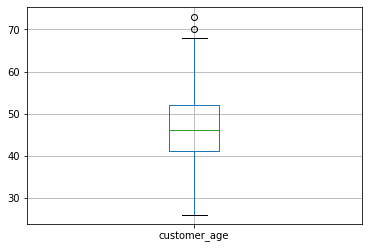

In [7]:
df.boxplot(column='customer_age', return_type='axes');


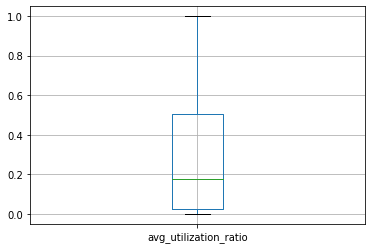

In [8]:
df.boxplot(column='avg_utilization_ratio', return_type='axes');

(array([2.650e+02, 6.540e+02, 1.478e+03, 1.778e+03, 2.422e+03, 1.920e+03,
        9.210e+02, 5.350e+02, 1.520e+02, 2.000e+00]),
 array([26. , 30.7, 35.4, 40.1, 44.8, 49.5, 54.2, 58.9, 63.6, 68.3, 73. ]),
 <a list of 10 Patch objects>)

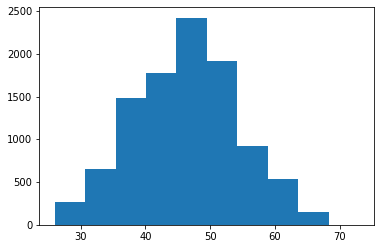

In [9]:
plt.hist(df['customer_age'])

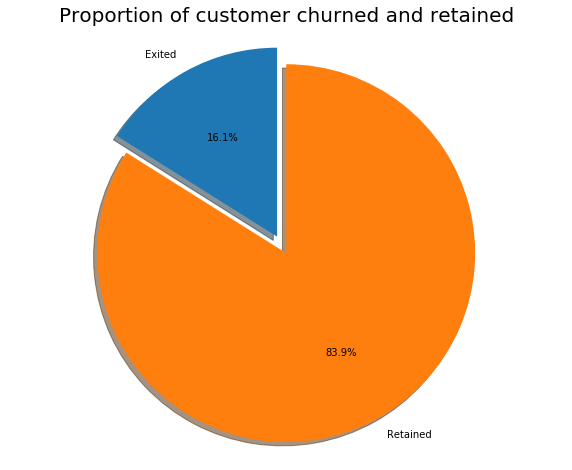

In [10]:
labels = 'Exited', 'Retained'
sizes = [df.attrition_flag[df['attrition_flag']=='Attrited Customer'].count(), df.attrition_flag[df['attrition_flag']=='Existing Customer'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

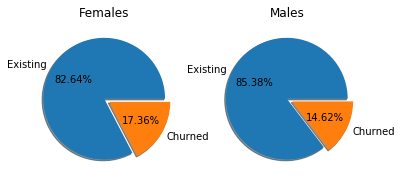

In [11]:
#______gender based division
sizes_f = df.loc[df['gender']=='F']['attrition_flag'].value_counts()
sizes_m = df.loc[df['gender']=='M']['attrition_flag'].value_counts()
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.pie(sizes_f,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
ax1.title.set_text('Females')
ax2.pie(sizes_m,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
ax2.title.set_text('Males')
plt.show()

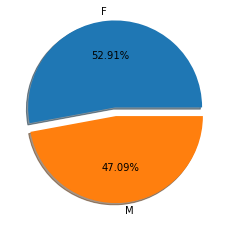

In [12]:
sizes_gender = df['gender'].value_counts()    #not much difference. thus it's equally distributed.
plt.pie(sizes_gender.tolist(),autopct='%1.2f%%',labels=sizes_gender.index.values,explode=[0.1,0],shadow=True)
plt.show()

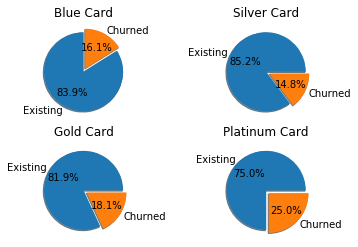

In [13]:
#______card category based
sizes_b = df.loc[df['card_category']=='Blue']['attrition_flag'].value_counts().tolist()
sizes_s = df.loc[df['card_category']=='Silver']['attrition_flag'].value_counts().tolist()
sizes_g = df.loc[df['card_category']=='Gold']['attrition_flag'].value_counts().tolist()
sizes_p = df.loc[df['card_category']=='Platinum']['attrition_flag'].value_counts().tolist()
fig,((axs0, axs1), (axs2, axs3)) = plt.subplots(2,2)
axs0.pie(sizes_b,explode=[0,0.1],shadow=True,autopct='%1.1f%%',labels=['Existing','Churned'],startangle=90)
axs0.title.set_text('Blue Card')
axs1.pie(sizes_s,explode=[0,0.1],shadow=True,autopct='%1.1f%%',labels=['Existing','Churned'])
axs1.title.set_text('Silver Card')
axs2.pie(sizes_g,explode=[0,0.1],shadow=True,autopct='%1.1f%%',labels=['Existing','Churned'])
axs2.title.set_text('Gold Card')
axs3.pie(sizes_p,explode=[0,0.1],shadow=True,autopct='%1.1f%%',labels=['Existing','Churned'])
axs3.title.set_text('Platinum Card')
plt.show()

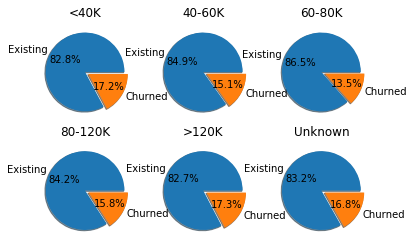

In [14]:
#______income category based

sizes_0 = df.loc[df['income_category']=='Less than $40K']['attrition_flag'].value_counts().tolist()
sizes_40 = df.loc[df['income_category']=='$40K - $60K']['attrition_flag'].value_counts().tolist()
sizes_60 = df.loc[df['income_category']=='$60K - $80K']['attrition_flag'].value_counts().tolist()
sizes_80 = df.loc[df['income_category']=='$80K - $120K']['attrition_flag'].value_counts().tolist()
sizes_120 = df.loc[df['income_category']=='$120K +']['attrition_flag'].value_counts().tolist()
sizes_unkn = df.loc[df['income_category']=='Unknown']['attrition_flag'].value_counts().tolist()

fig,((axs0, axs1, axs2), (axs3, axs4, axs5)) = plt.subplots(2,3)
axs0.pie(sizes_0,explode=[0,0.1],shadow=True,autopct='%1.1f%%',labels=['Existing','Churned'])
axs0.title.set_text('<40K')
axs1.pie(sizes_40,explode=[0,0.1],shadow=True,autopct='%1.1f%%',labels=['Existing','Churned'])
axs1.title.set_text('40-60K')
axs2.pie(sizes_60,explode=[0,0.1],shadow=True,autopct='%1.1f%%',labels=['Existing','Churned'])
axs2.title.set_text('60-80K')
axs3.pie(sizes_80,explode=[0,0.1],shadow=True,autopct='%1.1f%%',labels=['Existing','Churned'])
axs3.title.set_text('80-120K')
axs4.pie(sizes_120,explode=[0,0.1],shadow=True,autopct='%1.1f%%',labels=['Existing','Churned'])
axs4.title.set_text('>120K')
axs5.pie(sizes_unkn,explode=[0,0.1],shadow=True,autopct='%1.1f%%',labels=['Existing','Churned'])
axs5.title.set_text('Unknown')
plt.show()

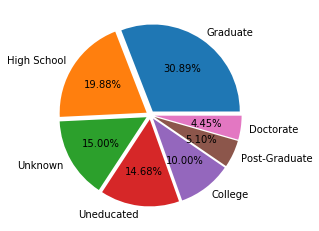

In [15]:
#-----education based----
sizes_edu = df['education_level'].value_counts()
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes_edu.tolist(),explode,labels=sizes_edu.index.values,autopct='%1.2f%%')
plt.show()

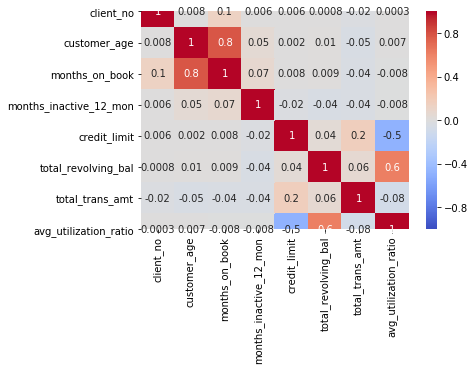

In [16]:
sbn.heatmap(df.corr(),annot=True,fmt = '.1g',vmin=-1,center=0,vmax=1,cmap='coolwarm')

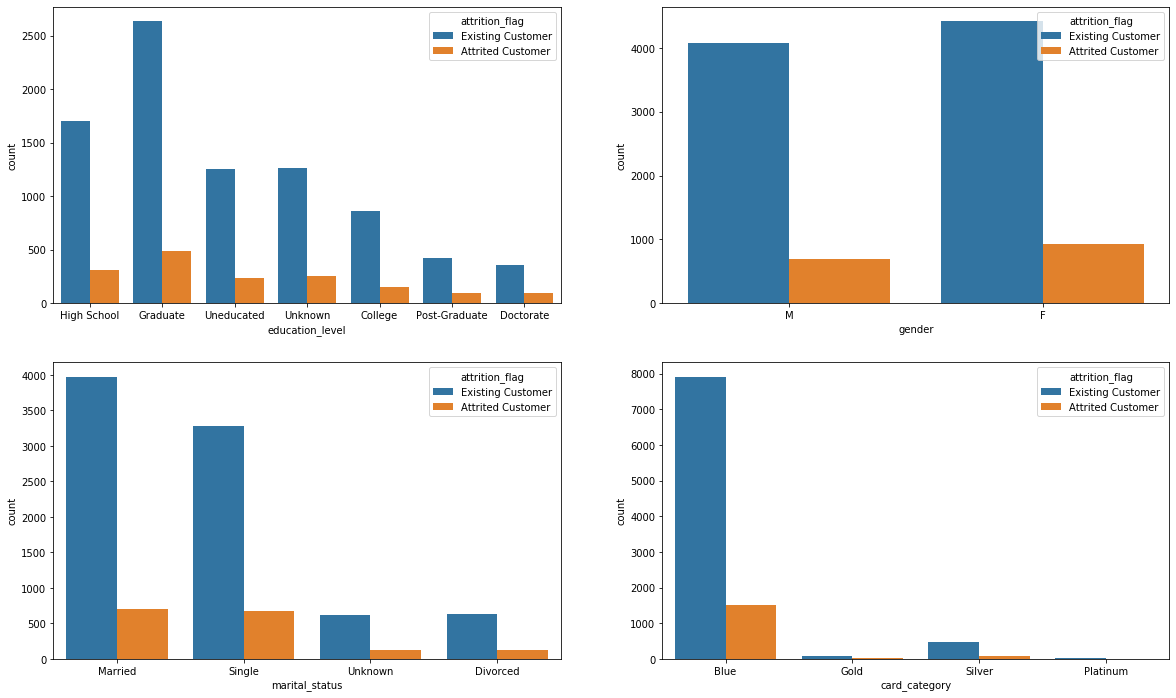

In [17]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sbn.countplot(x='education_level', hue = 'attrition_flag',data = df, ax=axarr[0][0])
sbn.countplot(x='gender', hue = 'attrition_flag',data = df, ax=axarr[0][1])
sbn.countplot(x='marital_status', hue = 'attrition_flag',data = df, ax=axarr[1][0])
sbn.countplot(x='card_category', hue = 'attrition_flag',data = df, ax=axarr[1][1])

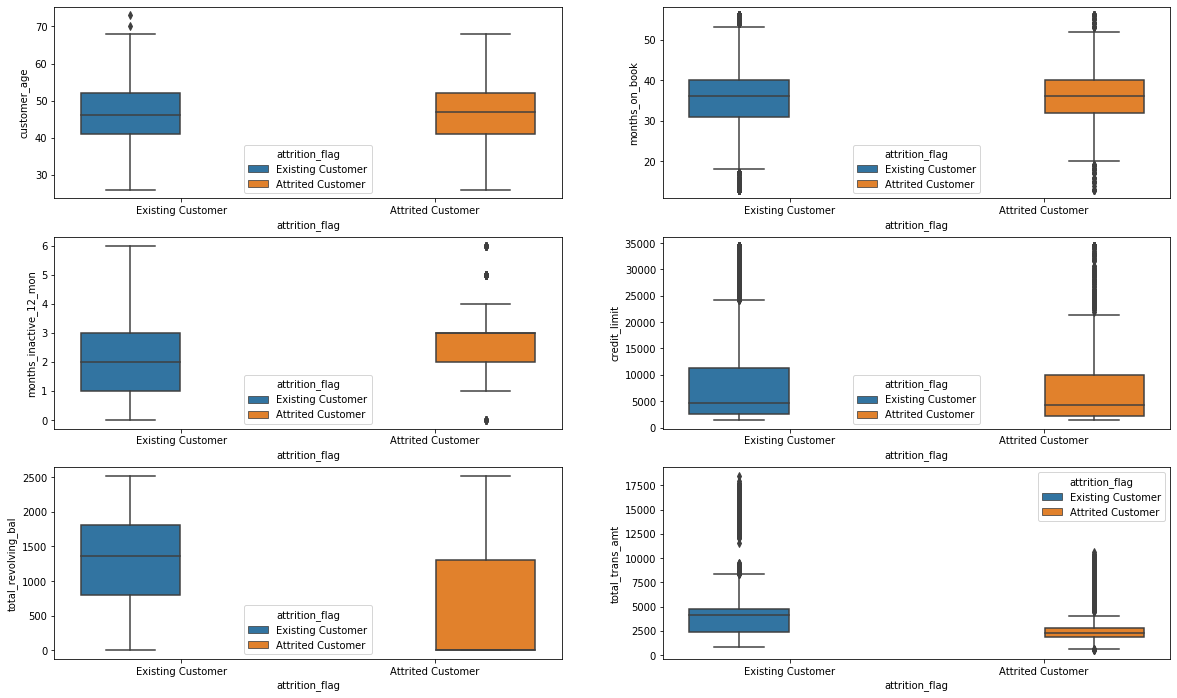

In [18]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sbn.boxplot(y='customer_age',x = 'attrition_flag', hue = 'attrition_flag',data = df, ax=axarr[0][0])
sbn.boxplot(y='months_on_book',x = 'attrition_flag', hue = 'attrition_flag',data = df, ax=axarr[0][1])
sbn.boxplot(y='months_inactive_12_mon',x = 'attrition_flag', hue = 'attrition_flag',data = df, ax=axarr[1][0])
sbn.boxplot(y='credit_limit',x = 'attrition_flag', hue = 'attrition_flag',data = df, ax=axarr[1][1])
sbn.boxplot(y='total_revolving_bal',x = 'attrition_flag', hue = 'attrition_flag',data = df, ax=axarr[2][0])
sbn.boxplot(y='total_trans_amt',x = 'attrition_flag', hue = 'attrition_flag',data = df, ax=axarr[2][1])

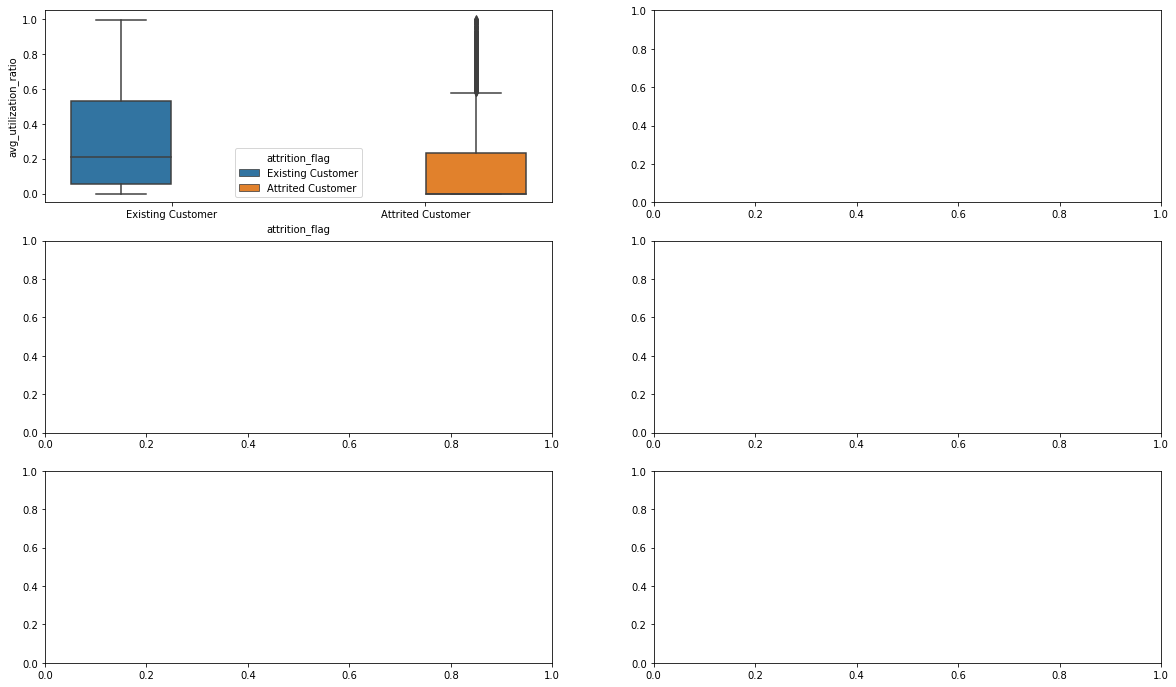

In [19]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sbn.boxplot(y='avg_utilization_ratio',x = 'attrition_flag', hue = 'attrition_flag',data = df, ax=axarr[0][0])

In [20]:
Q1 = df.customer_age.quantile(0.25)
Q3 = df.customer_age.quantile(0.75)
Q1, Q3

(41.0, 52.0)

In [21]:
IQR = Q3 - Q1
IQR

11.0

In [22]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(24.5, 68.5)

In [23]:
df[(df.customer_age<lower_limit)|(df.customer_age>upper_limit)]

,client_no,attrition_flag,customer_age,gender,education_level,marital_status,income_category,card_category,months_on_book,months_inactive_12_mon,credit_limit,total_revolving_bal,total_trans_amt,avg_utilization_ratio
251,715952883,Existing Customer,73,M,High School,Married,$40K - $60K,Blue,36,3,4469.0,1125,1765,0.252
254,787348608,Existing Customer,70,M,High School,Married,Less than $40K,Blue,56,2,3252.0,1495,1227,0.460


In [24]:
df_no_outlier = df[(df.customer_age>lower_limit)&(df.customer_age<upper_limit)]
df_no_outlier.head()

,client_no,attrition_flag,customer_age,gender,education_level,marital_status,income_category,card_category,months_on_book,months_inactive_12_mon,credit_limit,total_revolving_bal,total_trans_amt,avg_utilization_ratio
0,768805383,Existing Customer,45,M,High School,Married,$60K - $80K,Blue,39,1,12691.0,777,1144,0.061
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,Blue,44,1,8256.0,864,1291,0.105
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,Blue,36,1,3418.0,0,1887,0.000
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,Blue,34,4,3313.0,2517,1171,0.760
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,Blue,21,1,4716.0,0,816,0.000


In [25]:
df.shape

(10127, 14)

In [26]:
df_no_outlier.shape

(10125, 14)

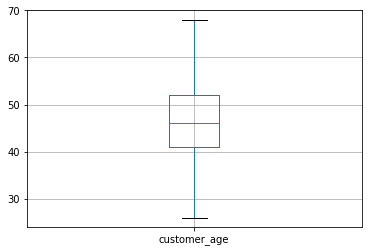

In [27]:
df_no_outlier.boxplot(column='customer_age', return_type='axes');

In [28]:
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

n=NormalizeData(df.months_on_book)

C:\Users\Dharshiny\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Normalized data')

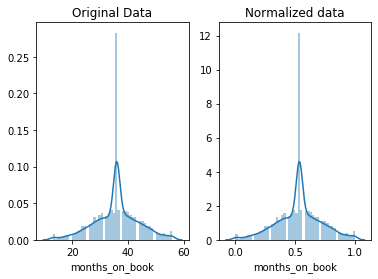

In [29]:
from scipy import stats
normalized_pledges = stats.boxcox(df.months_on_book)[0]
fig, ax=plt.subplots(1,2)
sbn.distplot(df.months_on_book, ax=ax[0])
ax[0].set_title("Original Data")
sbn.distplot(n, ax=ax[1])
ax[1].set_title("Normalized data")

In [30]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler as ss, MinMaxScaler as mms
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [31]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
minmax = MinMaxScaler()
le = LabelEncoder()
col=df.select_dtypes(include='object').columns
col

Index(['attrition_flag', 'gender', 'education_level', 'marital_status',
       'income_category', 'card_category'],
      dtype='object')

In [32]:
df[col]=df[col].apply(le.fit_transform)
cols=df.select_dtypes(include=['int64','float64']).columns[1:-1]
cols

Index(['customer_age', 'months_on_book', 'months_inactive_12_mon',
       'credit_limit', 'total_revolving_bal', 'total_trans_amt'],
      dtype='object')

In [33]:
df[cols]=minmax.fit_transform(df[cols])

C:\Users\Dharshiny\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [34]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif,mutual_info_classif,SelectPercentile
skc = SelectKBest(score_func=f_classif).fit(df.drop(['attrition_flag'],axis=1),df['attrition_flag'])
features = pd.DataFrame(skc.scores_,df.drop(['attrition_flag'],axis=1).columns)
features.sort_values(by=0,ascending=False)

,0
total_revolving_bal,752.702408
avg_utilization_ratio,332.876795
total_trans_amt,296.227714
months_inactive_12_mon,240.910376
client_no,21.874458
gender,14.085007
credit_limit,5.773729
marital_status,3.503085
customer_age,3.356074
income_category,3.131546


In [35]:
cols=features[features[0]>100].index
cols

Index(['months_inactive_12_mon', 'total_revolving_bal', 'total_trans_amt',
       'avg_utilization_ratio'],
      dtype='object')

In [36]:
df

,client_no,attrition_flag,customer_age,gender,education_level,marital_status,income_category,card_category,months_on_book,months_inactive_12_mon,credit_limit,total_revolving_bal,total_trans_amt,avg_utilization_ratio
0,768805383,1,0.404255,1,3,1,2,0,0.604651,0.166667,0.340190,0.308701,0.035273,0.061
1,818770008,1,0.489362,0,2,2,4,0,0.720930,0.166667,0.206112,0.343266,0.043452,0.105
2,713982108,1,0.531915,1,2,1,3,0,0.534884,0.166667,0.059850,0.000000,0.076611,0.000
3,769911858,1,0.297872,0,3,3,4,0,0.488372,0.666667,0.056676,1.000000,0.036775,0.760
4,709106358,1,0.297872,1,5,1,2,0,0.186047,0.166667,0.099091,0.000000,0.017025,0.000
5,713061558,1,0.382979,1,2,1,1,0,0.534884,0.166667,0.077747,0.495431,0.032158,0.311
6,810347208,1,0.531915,1,6,1,0,1,0.767442,0.166667,1.000000,0.899484,0.045621,0.066
7,818906208,1,0.127660,1,3,3,2,3,0.325581,0.333333,0.835690,0.554629,0.057194,0.048
8,710930508,1,0.234043,1,5,2,2,0,0.534884,0.333333,0.632260,1.000000,0.046734,0.113
9,719661558,1,0.468085,1,2,2,3,0,0.534884,0.500000,0.308900,0.666269,0.051797,0.144


In [37]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,recall_score
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(df[cols],df['attrition_flag'],test_size=0.3,random_state=11)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)
predict=lr.predict(test_x)
print('Accuracy Score',accuracy_score(predict,test_y)*100)
print('F1 Score',f1_score(predict,test_y)*100)
print('Recall Score',f1_score(predict,test_y)*100)
print('Classification Report\n',classification_report(predict,test_y))
print('Confusion Matrix\n',confusion_matrix(predict,test_y))

Accuracy Score 84.20533070088845
F1 Score 91.2885662431942
Recall Score 91.2885662431942
Classification Report
               precision    recall  f1-score   support

           0       0.09      0.83      0.15        53
           1       1.00      0.84      0.91      2986

   micro avg       0.84      0.84      0.84      3039
   macro avg       0.54      0.84      0.53      3039
weighted avg       0.98      0.84      0.90      3039

Confusion Matrix
 [[  44    9]
 [ 471 2515]]


C:\Users\Dharshiny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_x,train_y)
predict=dtc.predict(test_x)
print('Accuracy Score',accuracy_score(predict,test_y)*100)
print('F1 Score',f1_score(predict,test_y)*100)
print('Recall Score',recall_score(predict,test_y)*100)
print('Classification Report\n',classification_report(predict,test_y))
print('Confusion Matrix\n',confusion_matrix(predict,test_y))

Accuracy Score 87.857847976308
F1 Score 92.72906403940885
Recall Score 92.23833790670325
Classification Report
               precision    recall  f1-score   support

           0       0.62      0.65      0.63       488
           1       0.93      0.92      0.93      2551

   micro avg       0.88      0.88      0.88      3039
   macro avg       0.77      0.79      0.78      3039
weighted avg       0.88      0.88      0.88      3039

Confusion Matrix
 [[ 317  171]
 [ 198 2353]]


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
print('Accuracy Score',accuracy_score(predict,test_y)*100)
print('F1 Score',f1_score(predict,test_y)*100)
print('Recall Score',recall_score(predict,test_y)*100)
print('Classification Report\n',classification_report(predict,test_y))
print('Confusion Matrix\n',confusion_matrix(predict,test_y))

Accuracy Score 87.857847976308
F1 Score 92.72906403940885
Recall Score 92.23833790670325
Classification Report
               precision    recall  f1-score   support

           0       0.62      0.65      0.63       488
           1       0.93      0.92      0.93      2551

   micro avg       0.88      0.88      0.88      3039
   macro avg       0.77      0.79      0.78      3039
weighted avg       0.88      0.88      0.88      3039

Confusion Matrix
 [[ 317  171]
 [ 198 2353]]


C:\Users\Dharshiny\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
from xgboost import XGBClassifier
xgc=XGBClassifier()
xgc.fit(train_x,train_y)
predict=xgc.predict(test_x)
print('Accuracy Score',accuracy_score(predict,test_y)*100)
print('F1 Score',f1_score(predict,test_y)*100)
print('Recall Score',recall_score(predict,test_y)*100)
print('Classification Report\n',classification_report(predict,test_y))
print('Confusion Matrix\n',confusion_matrix(predict,test_y))

Accuracy Score 92.0697597894044
F1 Score 95.33217121828396
Recall Score 93.25502084122775
Classification Report
               precision    recall  f1-score   support

           0       0.65      0.84      0.74       400
           1       0.98      0.93      0.95      2639

   micro avg       0.92      0.92      0.92      3039
   macro avg       0.81      0.89      0.84      3039
weighted avg       0.93      0.92      0.92      3039

Confusion Matrix
 [[ 337   63]
 [ 178 2461]]


In [41]:
#minmax.inverse_transform(test_y)
df1=test_y.to_frame()
df1["predict"]=predict
df1.head()

,attrition_flag,predict
6046,1,1
7265,1,1
6642,1,1
117,1,1
7787,1,1


In [42]:
df1=df1.replace({'attrition_flag':{1:"Loyal Customer",0:"Customer will churn"}})
df1=df1.replace({'predict':{1:"Loyal Customer",0:"Customer will churn"}})
df1.head()

,attrition_flag,predict
6046,Loyal Customer,Loyal Customer
7265,Loyal Customer,Loyal Customer
6642,Loyal Customer,Loyal Customer
117,Loyal Customer,Loyal Customer
7787,Loyal Customer,Loyal Customer


In [43]:
df1

,attrition_flag,predict
6046,Loyal Customer,Loyal Customer
7265,Loyal Customer,Loyal Customer
6642,Loyal Customer,Loyal Customer
117,Loyal Customer,Loyal Customer
7787,Loyal Customer,Loyal Customer
1669,Loyal Customer,Loyal Customer
9218,Customer will churn,Loyal Customer
719,Loyal Customer,Loyal Customer
7739,Loyal Customer,Loyal Customer
3784,Loyal Customer,Loyal Customer
